In [1]:
# ---------------------- Header ---------------------
%load_ext autoreload
%autoreload 2
import numpy as np
import make_data as md
import random
from matplotlib import pyplot as plt
plt.style.use('ggplot')

from scipy.interpolate import splprep, splev


In [2]:
# ------------------ Generate ----------------------
def generate(X, Y,):
    fig, ax = plt.subplots(2)
    ax[0].scatter(X,Y,marker='x')
    # Must be clockwise half circle
    md.make_shape('shape.geo', X,Y)
    coor = md.load_shape('shape.geo',[0,0], num=len(X))
    curv = md.curvature_line(coor, 0.02, 2,num=len(X))
    r = 1/(curv[:,3])

    ax[0].plot(X,Y,'k')

    ax[0].fill_between(X,Y,np.zeros_like(X), color='gray',alpha = 0.5, hatch='//')
    ax[0].plot([-0.75,0.75],[0,0],'k')
    ax[0].axis('equal')
    ax[1].plot(abs(r))
    ax[1].set_ylim(-0.1,0.5)
    #ax[1].set_yscale('log')
    ax[1].plot([-1,len(X)+1],[0.05, 0.05])
    plt.tight_layout()


In [2]:
# ----------------------- Free forming ------------------------
import tkinter as tk
import numpy as np
from scipy.interpolate import splprep, splev

# Global variables
points = [[-0.5,0]]
spline_points = []
wn = 600
hn = 600
def add_point(event):
    # Add clicked point to the list
    points.append(( (event.x-wn/2)/(wn/2), (event.y-hn/2)/(hn/2) ))
    # Generate spline with updated points
    generate_spline()
    # Draw the points
    draw_points()

def generate_spline():
    global spline_points
    if len(points) > 2:
        # Extract x and y coordinates from points

        end_points = points.copy()
        end_points.append((0.5, 0))
        x, y = zip(*end_points)
        # Compute the spline representation
        tck, u = splprep([x, y], s=0, k=2)
        # Evaluate the spline at new points
        u_new = np.linspace(0, 1, 40)
        spline_points = splev(u_new, tck)
        # Redraw canvas
        canvas.delete("spline")
        for i in range(len(spline_points[0]) - 1):
            x1, y1 = spline_points[0][i], spline_points[1][i]
            x2, y2 = spline_points[0][i+1], spline_points[1][i+1]
            canvas.create_line(wn/2+x1*wn/2, hn/2+y1*hn/2, wn/2+x2*wn/2, hn/2+y2*hn/2, fill="blue", tags="spline")

def draw_points():
    canvas.delete("points")
    for point in points:
        x, y = point
        x = wn/2 + x*wn/2
        y = hn/2 + y*hn/2
        canvas.create_oval(x - 3, y - 3, x + 3, y + 3, fill="red", tags="points")

def clear_canvas():
    global points, spline_points
    points = [[-0.5,0]]
    spline_points = []

    canvas.delete("spline")
    canvas.delete('points')

def draw_grid():
    width = canvas.winfo_width()
    height = canvas.winfo_height()
    for i in range(10, width, 10):
        canvas.create_line(i, 0, i, height, fill="gray", tags="grid")
    for j in range(10, height, 10):
        canvas.create_line(0, j, width, j, fill="gray", tags="grid")


# Create the main window
window = tk.Tk()
window.title("Spline Generator")

# Create the canvas
canvas = tk.Canvas(window, width=wn, height=hn, bg="white")
canvas.pack()

# Bind mouse click event to the canvas
canvas.bind("<Button-1>", add_point)

x, y = [-0.5, 0]
x = wn/2 + x*wn/2
y = hn/2 + y*hn/2
canvas.create_oval(x - 3, y - 3, x + 3, y + 3, fill="red")
x, y = [0.5, 0]
x = wn/2 + x*wn/2
y = hn/2 + y*hn/2
canvas.create_oval(x - 3, y - 3, x + 3, y + 3, fill="red")

# Create the clear button
clear_button = tk.Button(window, text="Clear", command=clear_canvas)
clear_button.pack()

# Draw the grid
draw_grid()

# Start the Tkinter event loop
window.mainloop()
# Geometry generation
n = 1500
coor = points.copy()
coor.append((0.5,0))
coor = np.array(coor)
coor[:,1] = -coor[:,1]

# Compute the closed spline representation
tck, u = splprep([coor[:,0], coor[:,1]], s=0, k=2)

# Evaluate the spline at new points
u_new = np.linspace(0, 1, n)
X, Y = splev(u_new, tck)

generate(X,Y)

NameError: name 'generate' is not defined

REMEMBER! points must be anticlockwise and describe a symmetric geometry
Data has been written to shape.geo


C:\Users\chris\AppData\Local\Temp\ipykernel_27280\3704807506.py:9: RuntimeWarning: divide by zero encountered in divide
  r = 1/(curv[:,3])


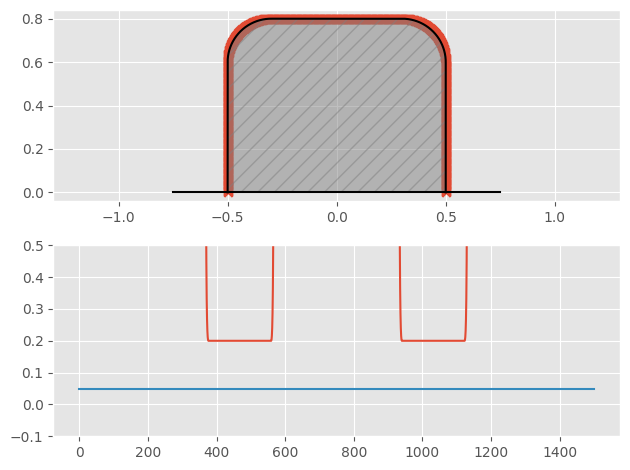

In [3]:
# ---- squares -----
n = 1500

h = 0.8
ny = np.array([0,1])
nx = np.array([1,0])
l = 1
r = 0.2

lt = 2*h + l + (np.pi-4)*r

n0 = np.array([-0.5,0])
ln = (h-r)
num = int(n * ln / lt)
step  = np.linspace( 0, ln, num).reshape((num,1))
n1 = n0 + ny * step

ln = np.pi * r/2
num = int(n* ln / lt)
step  = np.linspace( np.pi - np.pi/(2*num), np.pi/2, num).reshape((num,1))
n2 = n1[-1] + nx * (np.cos(step) * r + r) + ny * (np.sin(step) * r)

ln = l-2*r
num = int(n * ln / lt)
step  = np.linspace( ln/num, ln, num).reshape((num,1))
n3 = n2[-1] + nx * step

ln = np.pi * r/2
num = int(n* ln / lt)
step  = np.linspace( np.pi/2 - np.pi/(2*num), 0, num).reshape((num,1))
n4 = n3[-1] + nx * (np.cos(step) * r) + ny * (np.sin(step) * r - r)

coor = np.concatenate([n1, n2, n3, n4])

ln = (h-r)
num = n - len(coor)
step  = np.linspace( ln/num, ln, num).reshape((num,1))
n5 = n4[-1] - ny * step


coor = np.concatenate([n1, n2, n3, n4, n5])

generate(coor[:,0], coor[:,1])

REMEMBER! points must be anticlockwise and describe a symmetric geometry
Data has been written to shape.geo


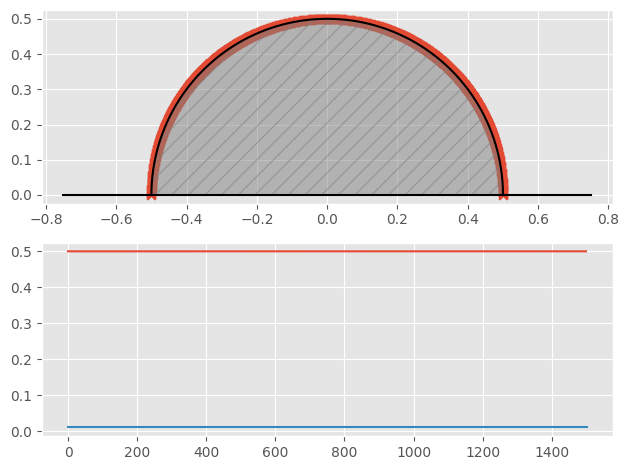

In [69]:
# -------------- wedge -----------------

# ---- circle -----
n = 1500
num = np.linspace(np.pi, 0, n)
X = np.cos(num) * 0.5
Y = np.sin(num) * 0.5


generate(X, Y)

In [19]:
# ------- make setup ------------
range1 = range(28)
range2 = range(20)
combinations = [(x, y) for x in range1 for y in range2]
random.shuffle(combinations)
for c in combinations:
    print(c[0], c[1])

7 11
16 15
18 13
2 4
8 17
17 18
13 2
20 4
15 17
16 2
21 16
10 1
22 16
25 15
21 1
22 14
5 17
20 11
16 7
11 13
14 5
6 15
1 14
5 0
24 8
3 8
20 14
11 16
10 7
11 11
16 4
26 1
23 7
12 14
10 19
27 11
24 10
20 3
25 14
3 16
25 3
8 3
5 1
21 12
20 7
15 16
14 10
6 10
19 0
13 15
25 12
14 19
25 1
18 12
5 19
2 19
11 7
13 14
6 0
14 6
5 7
2 10
0 6
1 5
15 9
14 4
19 3
18 18
27 16
18 8
5 4
0 8
24 3
17 3
27 13
7 5
11 2
18 5
1 16
23 12
7 4
13 18
26 14
5 3
19 2
26 7
19 5
15 2
26 19
16 13
10 10
21 3
5 6
10 12
23 5
20 18
5 13
15 4
16 12
8 18
21 8
23 3
0 5
7 0
7 14
24 18
19 6
7 13
4 7
22 6
27 15
3 4
7 10
9 15
9 5
1 13
26 12
0 11
12 17
21 10
20 19
22 18
26 2
12 0
24 1
17 13
20 15
21 4
14 11
11 10
1 2
20 12
13 7
1 11
0 12
5 16
27 14
11 19
3 10
13 19
6 1
5 18
10 5
12 13
19 11
25 11
19 13
3 1
26 18
6 2
27 0
0 2
17 7
26 3
1 8
15 14
4 0
3 5
0 15
11 12
12 11
10 2
9 10
10 14
25 19
10 6
27 4
17 16
2 14
24 5
9 9
1 1
8 0
0 18
15 18
15 19
25 17
1 10
14 13
19 10
1 3
3 2
16 19
5 2
4 19
23 14
0 14
12 4
8 10
14 17
7 12
26 6
24